In [43]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

Harvard President, Claudine Gay is being accused of plagiarism. The Fox News article focused the reports on the extensive allegations, questioning the integrity of Claudine Gay. In the other article, Retuters reports on the response of Claudine Gay. The difference in the two reports is that Fox News emphasizes the mistake and points out the immorality of plagirism, while Reuters focuses on the response of the president and institution. This shows how different media sources can report on the same topic from completely different perspectives.


In [44]:
from PyPDF2 import PdfReader

reader = PdfReader("fox_news.pdf")
number_of_pages = len(reader.pages)
page = reader.pages[0]
text_fox = page.extract_text()
# print(text_fox)

In [45]:
reader = PdfReader("reuters.pdf")
number_of_pages = len(reader.pages)
page = reader.pages[0]
text_reuters = page.extract_text()
# print(text_reuters)

It does not seem to be able to print the entire pdf, the fox news article gets stuck at the first picture and the reuters article gets stuck at the first page. 

In [52]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

sentiment_fox = sia.polarity_scores(text_fox)
sentiment_reuters = sia.polarity_scores(text_reuters)

print(sentiment_fox)
print(sentiment_reuters)


{'neg': 0.047, 'neu': 0.86, 'pos': 0.093, 'compound': 0.8743}
{'neg': 0.033, 'neu': 0.967, 'pos': 0.0, 'compound': -0.4588}


The Fox News article shows a lot of positive tones which is not what I would have expected based on the focus of the article alone and the way that the article reads. The Reuters article is much more factual with no positive, very little negative and mainly neutral tone. 

In [48]:
fox_headline = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"
reuters_headline = "Harvard president will submit dissertation edits after plagiarism allegations"

results_fox = sia.polarity_scores(fox_headline)
results_reuters = sia.polarity_scores(reuters_headline)

print(results_fox)
print(results_reuters)

{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


The Fox News headline analysis does not align with the article analysis, showing a neutral to negative tone overall. The Reuters aritcle however falls more in line with what the results of the text of the article were. 

In [51]:
from readability import Readability

fox_readability = Readability(text_fox)
reuters_readability = Readability(text_reuters)

f_fox = fox_readability.flesch()
r_reuters = reuters_readability.flesch()

print(f_fox.score)
print(f_fox.ease)
print(f_fox.grade_levels)

print(r_reuters.score)
print(r_reuters.ease)
print(r_reuters.grade_levels)



7.866140703517601
very_confusing
['college_graduate']
-11.331669708029153
very_confusing
['college_graduate']


The readibility results are supposed to be on a scale of 0-100. The fact that one is negative is very interesting and shows that most likely the problem was reading in the pdf file. Both articles are classified as very confusing and meant for the grade level of a college graduate. 

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

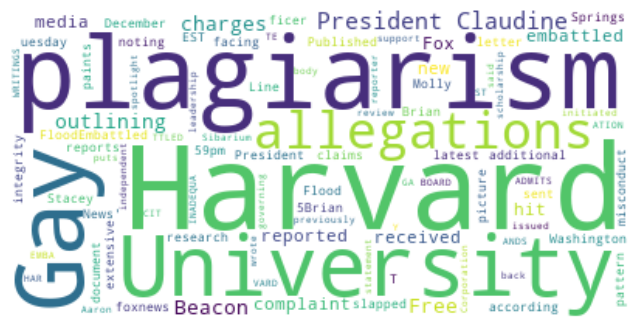

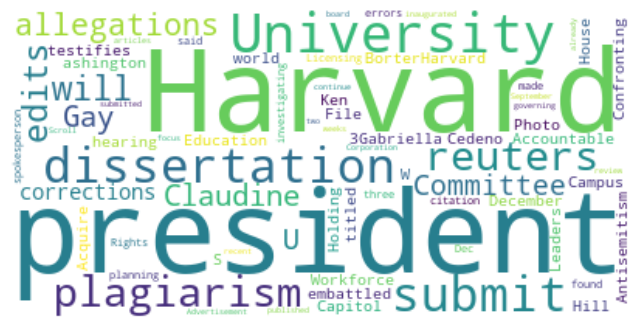

In [54]:
wordcloud_fox = WordCloud(background_color='white').generate(text_fox)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_fox, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud_reuters = WordCloud(background_color='white').generate(text_reuters)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_reuters, interpolation='bilinear')
plt.axis('off')
plt.show()

The Fox News article shows focus on the presidents name more than Reuters article. Both talk about the name of the school about equally, backing up what we read in the article we see Fox News used the word plagarism more often and charges, referring to the actual offenses. 